In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [220]:
tf = 1e-2
t = np.array([np.linspace(0, tf, 100000)])
dt = t[0,1]-t[0,0]

omega1 = 1e4

B0 = np.array([0,0,1])

A = 0.1

C = 1e4

B1 = np.array([[A,0,0.0]]).transpose()

tlist = np.squeeze(t)

tau = tf*0.1

B1osc = B1*np.cos(omega1*t)*np.exp(-(t-tf/2)**2/tau**2)

In [221]:
mu = B1osc*0
mu[:,0] = np.array([0,0,1])
np.shape(B1osc)

(3, 100000)

In [222]:
def cross(a, b):
    c = np.array([a[1]*b[2] - a[2]*b[1], a[2]*b[0] - a[0]*b[2], a[0]*b[1] - a[1]*b[0]])
    return c

In [223]:
for i in range(0, len(tlist)-1):
    
    B = np.squeeze(B0 + B1osc[:,i])
    
    mu_i = np.squeeze(mu[:,i])
    
    dmu_dt = C*cross(B, mu_i)
    
    mu[:,i+1] = mu[:,i] + dt*dmu_dt
    


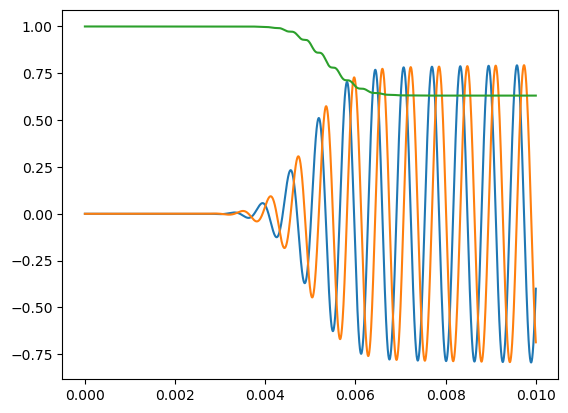

In [224]:
plt.plot(tlist, mu[0,:])
plt.plot(tlist, mu[1,:])
plt.plot(tlist, mu[2,:])